In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

from collections import defaultdict

Matplotlib is building the font cache; this may take a moment.


In [3]:
ratings = []

for category in ["customer_support", "finance", "health_care"]:
    for file in os.listdir(f"ratings/{category}"):
        if file != ".ipynb_checkpoints":
            
            # Find model type
            model = file.split("_")[1]
            
            with open(f"ratings/{category}/{file}") as f:
                text = f.read()
                # Combine data and metadata
                combined = {**{"Model": model, "Category": category}, **dict([score[2:].split(":") for score in text.split("\n")[4:]])}
                combined = {k: float(v) if k not in ["Model", "Category"] else v for k, v in combined.items() }
                ratings.append(combined)
                
df = pd.DataFrame(ratings)

In [4]:
df.drop("Category", axis=1).groupby("Model").agg(["mean", "std"])

Feature attention           Temporal attention            \
                      mean       std               mean       std   
Model                                                               
CNN                    5.2  1.788854                4.6  2.701851   
CNN-LSTM               6.6  2.509980                5.4  1.673320   
LSTM                   6.4  2.302173                5.4  2.302173   

         Spatiotemporal attention           General            
                             mean       std    mean       std  
Model                                                          
CNN                           5.4  2.073644     6.4  1.140175  
CNN-LSTM                      6.4  2.408319     6.8  1.095445  
LSTM                          5.4  1.140175     6.0  0.707107

In [5]:
sliders = []

for category in ["customer_support", "finance", "health_care"]:
    for file in os.listdir(f"sliders/{category}"):
        if file != ".ipynb_checkpoints":
            
            # Find model type
            model = file.split("_")[1]
            
            with open(f"sliders/{category}/{file}") as f:
                text = f.read()
                # Combine data and metadata                               
                combined = {**{"Model": model, "Category": category}, **eval(text.split("\n")[-1][8:])}
                combined = {k: float(v) if k not in ["Model", "Category"] else v for k, v in combined.items() }
                sliders.append(combined)

df1 = pd.DataFrame(sliders) #.iloc[:, 2:].sum(axis=1)

In [6]:
df1.iloc[:, 2:] = df1.iloc[:, 2:].divide(df1.iloc[:, 2:].sum(axis=1), axis=0) * 100
df1

,Model,Category,isco code,function id,company,education,days worked,isco level,CV,skills,certificates,languages,licenses,location
0,LSTM,customer_support,12.406203,9.754877,7.703852,14.407204,14.407204,0.000000,15.257629,0.000000,0.000000,16.108054,0.000000,9.954977
1,CNN,customer_support,8.872180,7.468672,3.759398,11.478697,8.320802,1.253133,18.245614,24.060150,12.781955,1.253133,1.253133,1.253133
2,CNN,customer_support,0.000000,0.000000,23.716012,0.000000,23.967774,14.551863,0.000000,0.000000,0.000000,18.429003,0.000000,19.335347
3,LSTM,customer_support,11.405703,16.258129,9.704852,11.805903,4.652326,1.250625,7.803902,17.858929,7.953977,6.053027,2.101051,3.151576
4,CNN-LSTM,customer_support,9.466264,14.702920,2.567976,14.300101,6.696878,1.258812,17.321249,26.737160,1.258812,1.258812,1.258812,3.172205
5,CNN-LSTM,customer_support,5.002501,4.902451,3.201601,21.260630,22.211106,13.956978,0.000000,0.000000,0.000000,20.260130,0.000000,9.204602
6,CNN-LSTM,finance,1.256281,9.497487,3.919598,23.417085,2.964824,23.417085,16.130653,12.412060,1.256281,1.256281,1.256281,3.216080
7,LSTM,finance,1.250000,10.600000,7.200000,5.850000,10.450000,11.000000,12.850000,13.400000,12.350000,1.100000,7.850000,6.100000
8,LSTM,finance,1.255020,27.208835,27.259036,20.833333,0.000000,15.060241,2.108434,1.255020,1.255020,1.255020,1.255020,1.255020
9,CNN-LSTM,finance,1.200600,1.200600,5.002501,12.756378,5.002501,21.510755,16.858429,21.510755,1.250625,10.105053,0.000000,3.601801


In [7]:
model_ratings = df1.drop("Category", axis=1).groupby("Model").mean()

In [8]:
model_ratings.index = ["CNN", "CNN_LSTM", "LSTM"]

In [9]:
(10 / 272) * 187

6.875

In [10]:
# CNN-LSTM
CNN_LSTM_finance = {"company" : 19.8, "isco level": 18.3, "function id": 15.7, 
                    "isco code": 13.1, "CV": 10.8, "skills":8, "education":6.7, 
                    "languages":5.8, "certificates":1.2, "licenses":0.9, 
                    "location": 0, "days worked": 0}

CNN_LSTM_health = {"company" : 18.4, "isco level": 5.7, "function id": 16.6, 
                   "isco code": 12.0, "CV": 9.1, "skills":5.1, "education":11.8, 
                   "languages":8.8, "certificates":6.8, "licenses":0, 
                   "location": 0.8, "days worked": 4.8}

CNN_LSTM_cust_sup = {"company" : 21.6, "isco level": 6.8, "function id": 20.56, 
                     "isco code": 17.12, "CV": 15.04, "skills": 5.68, "education": 6.24, 
                     "languages": 2.72, "certificates":2.24, "licenses":0, 
                     "location": 0.8, "days worked": 0}

# CNN
CNN_finance = {"company" : 12.604651162790697, "isco level": 6.4186046511627906, "function id": 11.581395348837209, 
               "isco code": 8.69767441860465, "CV": 6.883720930232558, "skills": 6.883720930232558, "education": 10.0, 
               "languages": 6.883720930232558, "certificates": 6.883720930232558, "licenses": 6.883720930232558, 
               "location": 8.372093023255815, "days worked": 7.348837209302325}

CNN_health = {"company" : 17.15909090909091, "isco level": 4.090909090909091, "function id": 24.204545454545453, 
              "isco code": 30.795454545454543, "CV": 0, "skills": 0, "education": 22.272727272727273, 
              "languages": 0, "certificates": 0.11363636363636363, "licenses": 0, 
              "location": 0.7954545454545454, "days worked": 0}

CNN_cust_sup = {"company" : 10.464135021097047, "isco level": 7.594936708860759, "function id": 11.434599156118143, 
                "isco code": 9.70464135021097, "CV": 7.21518987342, "skills": 7.21518987342, "education": 8.734177215189874, 
                "languages":7.341772151898734, "certificates":7.29957805907, "licenses": 7.679324894514767, 
                "location": 7.763713080168776, "days worked": 6.91983122363}

# LSTM
LSTM_finance = {"company" : 8.495575221238937, "isco level": 11.946902654867257, "function id": 8.539823008849558, 
                "isco code": 9.336283185840708, "CV": 6.460176991150442, "skills": 6.4159292035398225, "education": 8.982300884955752, 
                "languages": 8.716814159292035, "certificates": 6.327433628318584, "licenses": 8.362831858407079, 
                "location": 7.079646017699115, "days worked": 8.672566371681416}

LSTM_health = {"company" : 8.920454545454545, "isco level": 15.397727272727272, "function id": 9.318181818181818, 
               "isco code": 10.568181818181818, "CV": 6.420454545454545, "skills": 6.420454545454545, "education": 8.011363636363637, 
               "languages": 6.477272727272727, "certificates": 6.420454545454545, "licenses": 6.420454545454545, 
               "location": 6.420454545454545, "days worked": 8.579545454545455}

LSTM_cust_sup = {"company" : 9.852941176470589, "isco level": 9.926470588235295, "function id": 9.007352941176471, 
                 "isco code": 9.705882352941178, "CV": 6.875, "skills": 6.9485294117647065, "education": 9.705882352941178, 
                 "languages": 7.3161764705882355, "certificates": 6.838235294117648, "licenses": 8.345588235294118, 
                 "location": 7.426470588235294, "days worked": 7.5}

In [11]:
import warnings
warnings.filterwarnings("ignore")

# Per model

CNN_LSTM
 - Pearson's r: 0.19206020869011795
 - RMSE: 7.261846670067501
 - MAE:  5.716763922242062
CNN
 - Pearson's r: 0.1688087197760565
 - RMSE: 5.419944098039621
 - MAE:  4.278864964145909
LSTM
 - Pearson's r: 0.24066780943556568
 - RMSE: 3.660761604291391
 - MAE:  3.2587470988789278


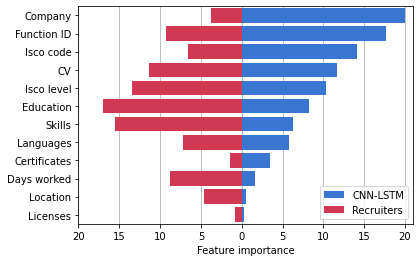

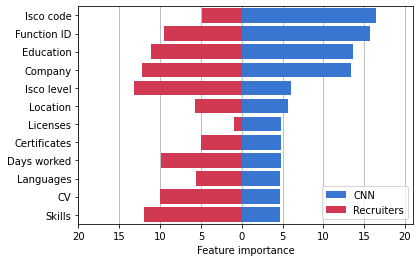

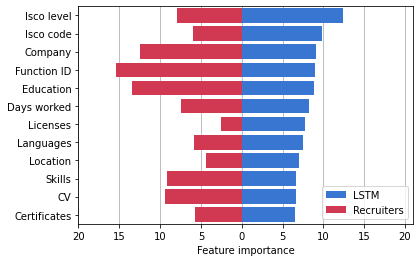

In [92]:
for model in ["CNN_LSTM", "CNN", "LSTM"]:    
    df = pd.DataFrame([eval(f"{model}_finance"), 
                       eval(f"{model}_health"), 
                       eval(f"{model}_cust_sup")]).mean(axis=0) #.sort_values(ascending=False)
    
    df2 = model_ratings.loc[model]
    
    combined = pd.concat([df.rename(model), (df2 * -1).rename("Recruiters")], axis=1)
    
    combined.index = ["Company", "Isco level", "Function ID", "Isco code", "CV", "Skills", "Education", "Languages", "Certificates", "Licenses", "Location", "Days worked"]
    combined = combined.sort_values(by=model, ascending=False)
    
    print(model)
    print(" - Pearson's r:", combined.abs().corr().loc[model, "Recruiters"])
    print(" - RMSE:", np.sqrt(np.sum((combined.abs()["Recruiters"] - combined.abs()[model])**2) / len(combined)))
    print(" - MAE: ", np.sum(np.abs(combined.abs()["Recruiters"] - combined.abs()[model])) / len(combined))
    
    fig, ax = plt.subplots(figsize=(6, 4))
    
    sns.barplot(x=combined[model].values, y=combined.index, color="#1F71EB", label=model.replace("_", "-"), ax=ax)
    sns.barplot(x=combined["Recruiters"].values, y=combined.index, color="#EB1F41", label='Recruiters', ax=ax)

    plt.xlim(-20, 21)

    plt.legend(loc="lower right")
   # plt.xticks(rotation=90);
    ax.set_autoscale_on(False)
    ticks =  ax.get_xticks()
    
    # set labels to absolute values and with integer representation
    plt.xlabel("Feature importance")
    ax.set_xticklabels([int(abs(tick)) for tick in ticks])
    ax.grid(axis = 'x')
    ax.set_axisbelow(True)
    
    plt.plot()
    plt.savefig(f"Visualisations/{model}_recruiters.pdf", bbox_inches='tight');

# Average

In [29]:
df = pd.DataFrame([CNN_LSTM_finance, 
                   CNN_LSTM_health, 
                   CNN_LSTM_cust_sup,
                   CNN_finance, 
                   CNN_health, 
                   CNN_cust_sup,
                   LSTM_finance, 
                   LSTM_health, 
                   LSTM_cust_sup]).mean(axis=0) #.sort_values(ascending=False)

df2 = model_ratings.mean(axis=0)

combined = pd.concat([df.rename("Models"), (df2 * -1).rename("Recruiters")], axis=1).sort_values(by="Models", ascending=False)

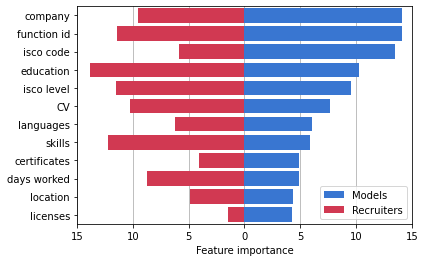

In [30]:
fig, ax = plt.subplots(figsize=(6, 4))
    
sns.barplot(x=combined["Models"].values, y=combined.index, color="#1F71EB", label="Models", ax=ax)
sns.barplot(x=combined["Recruiters"].values, y=combined.index, color="#EB1F41", label='Recruiters', ax=ax)

plt.xlim(-15, 15)

plt.legend(loc="lower right")
# plt.xticks(rotation=90);
ax.set_autoscale_on(False)
ticks = ax.get_xticks()

# set labels to absolute values and with integer representation
plt.xlabel("Feature importance")
ax.set_xticklabels([int(abs(tick)) for tick in ticks])
ax.grid(axis = 'x')
ax.set_axisbelow(True)

plt.plot()
plt.savefig(f"Visualisations/All_recruiters.pdf", bbox_inches='tight');